<a href="https://colab.research.google.com/github/javieroch/Javier-Ochoa/blob/main/Copia_de_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar R magic
%load_ext rpy2.ipython

# Instalar el paquete readr
%R install.packages("readr")

(as ‘lib’ is unspecified)



The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython








	‘/tmp/RtmpxaHB9h/downloaded_packages’



In [ ]:
import pandas as pd

# Cargar los datos desde la URL
url = "https://www.diegocalvo.es/wp-content/uploads/2016/09/datos-regresion-lineal-simple.txt"
datos = pd.read_csv(url, sep="\t")

# Comprobación de cabeceras
print(datos.head())

# Comprobación de la carga de datos

   N_Cajas  Tiempo
0       10      24
1       15      27
2       10      29
3       20      31
4       25      25


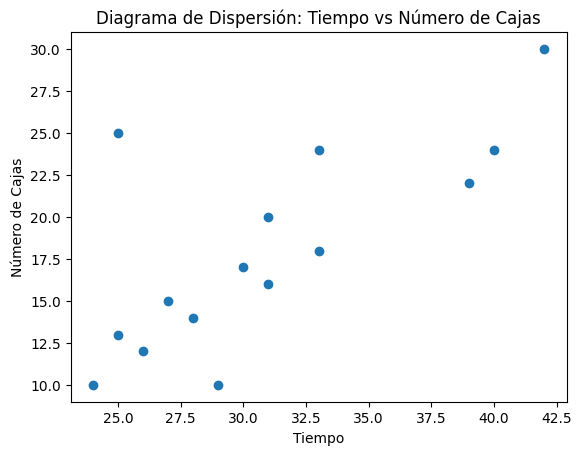

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde la URL
url = "https://www.diegocalvo.es/wp-content/uploads/2016/09/datos-regresion-lineal-simple.txt"
datos = pd.read_csv(url, sep="\t")

# Representar ambas variables gráficamente (diagrama de dispersión)
plt.scatter(datos['Tiempo'], datos['N_Cajas'])
plt.xlabel('Tiempo')
plt.ylabel('Número de Cajas')
plt.title('Diagrama de Dispersión: Tiempo vs Número de Cajas')
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Cargar los datos desde la URL
url = "https://www.diegocalvo.es/wp-content/uploads/2016/09/datos-regresion-lineal-simple.txt"
datos = pd.read_csv(url, sep="\t")

# Definir las variables dependiente e independiente
X = datos['N_Cajas']
y = datos['Tiempo']

# Añadir una constante a la variable independiente (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal simple
modelo = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(modelo.summary())

# Obtener los coeficientes del modelo
intercepto, pendiente = modelo.params

# Imprimir la ecuación de la recta de mínimos cuadrados
print(f"La ecuación de la recta de mínimos cuadrados es: Y = {pendiente:.4f} * X + {intercepto:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 Tiempo   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     14.37
Date:                Wed, 15 May 2024   Prob (F-statistic):            0.00224
Time:                        03:15:49   Log-Likelihood:                -41.204
No. Observations:                  15   AIC:                             86.41
Df Residuals:                      13   BIC:                             87.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5452      3.414      5.432      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# Calcular la matriz de coeficientes de correlación
matriz_correlacion = datos.corr()

# Imprimir la matriz de coeficientes de correlación
print(matriz_correlacion)

          N_Cajas    Tiempo
N_Cajas  1.000000  0.724647
Tiempo   0.724647  1.000000


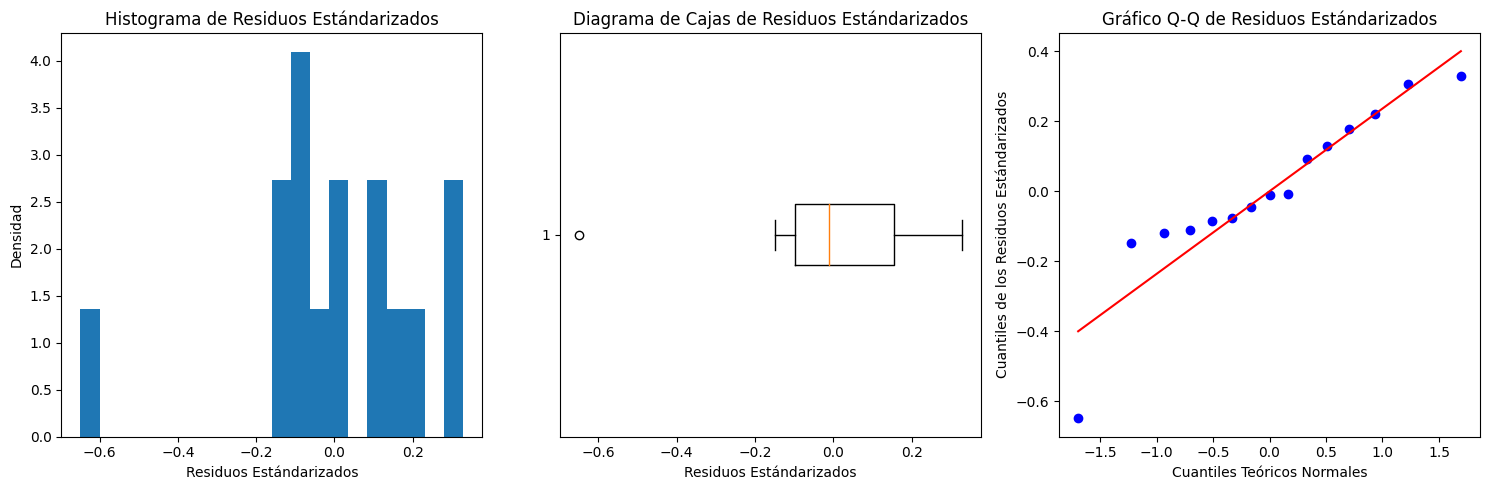

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calcular los residuos estandarizados del modelo ajustado
residuos = modelo.resid / modelo.scale

# Crear una figura con 1 fila y 3 columnas
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histograma de los residuos estandarizados
axs[0].hist(residuos, bins=20, density=True)
axs[0].set_title('Histograma de Residuos Estándarizados')
axs[0].set_xlabel('Residuos Estándarizados')
axs[0].set_ylabel('Densidad')

# Diagrama de cajas de los residuos estandarizados
axs[1].boxplot(residuos, vert=False)
axs[1].set_title('Diagrama de Cajas de Residuos Estándarizados')
axs[1].set_xlabel('Residuos Estándarizados')

# Gráfico de cuantiles de los residuos estandarizados
stats.probplot(residuos, dist="norm", plot=axs[2])
axs[2].set_title('Gráfico Q-Q de Residuos Estándarizados')
axs[2].set_xlabel('Cuantiles Teóricos Normales')
axs[2].set_ylabel('Cuantiles de los Residuos Estándarizados')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

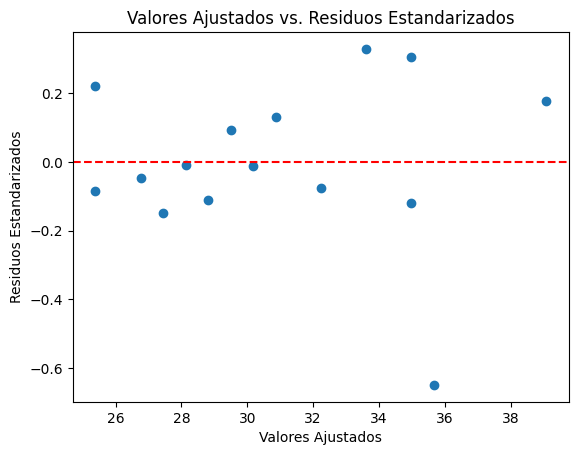

In [ ]:
import matplotlib.pyplot as plt

# Gráfico 2D de los valores ajustados vs. los residuos estandarizados
plt.scatter(modelo.fittedvalues, residuos)
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estandarizados')
plt.title('Valores Ajustados vs. Residuos Estandarizados')
plt.axhline(y=0, color='red', linestyle='--')  # Línea horizontal en 0
plt.show()

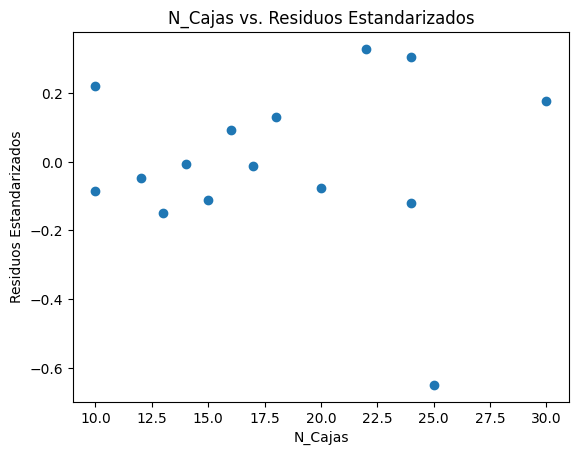

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de N_Cajas vs. Residuos estandarizados
plt.scatter(datos['N_Cajas'], residuos)
plt.xlabel('N_Cajas')
plt.ylabel('Residuos Estandarizados')
plt.title('N_Cajas vs. Residuos Estandarizados')
plt.show()

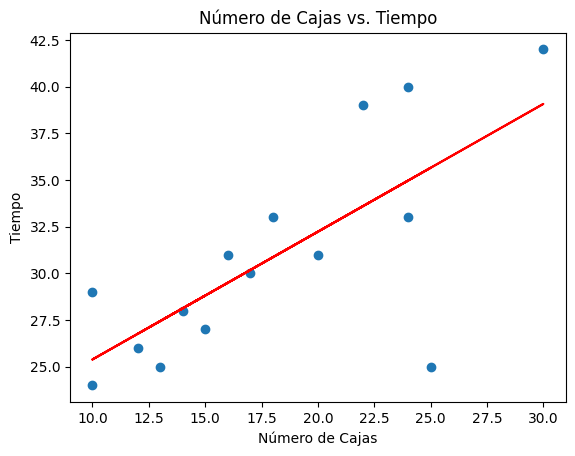

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de N_Cajas vs. Tiempo
plt.scatter(datos['N_Cajas'], datos['Tiempo'])
plt.xlabel('Número de Cajas')
plt.ylabel('Tiempo')
plt.title('Número de Cajas vs. Tiempo')

# Agregar la línea de regresión ajustada
plt.plot(datos['N_Cajas'], modelo.predict(), color='red')

plt.show()

In [ ]:
# Crear un DataFrame con el valor de N_Cajas para la predicción, incluyendo el término constante
tiempo_estimado = pd.DataFrame({'constante': [1], 'N_Cajas': [24]})

# Realizar la predicción
prediccion = modelo.predict(tiempo_estimado)

# Imprimir la predicción
print(prediccion)

0    34.97381
dtype: float64
